In [1]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.api import VAR
from scipy.stats import spearmanr
import numpy as np
import matplotlib.pyplot as plt

In [10]:
etf_list = ['DIA', 'IWM', 'QQQ', 'SPY', 'VXX', 'XLB', 'XLC', 'XLE', 'XLF', 
            'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV', 'XLY']
start_date = '2018-01-01'
end_date = '2023-12-31'

# 获取数据
df = pd.DataFrame()
for etf in etf_list:
    df[etf] = yf.download(etf, start=start_date, end=end_date)['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [11]:
df

,DIA,IWM,QQQ,SPY,VXX,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,
2018-01-02 00:00:00-05:00,248.020004,153.899994,158.490005,268.769989,NaN,61.389999,NaN,73.449997,27.920000,76.120003,64.739998,56.540001,32.750000,52.189999,83.610001,100.190002
2018-01-03 00:00:00-05:00,248.949997,154.059998,160.029999,270.470001,NaN,61.820000,NaN,74.550003,28.070000,76.529999,65.279999,56.520000,32.759998,51.779999,84.410004,100.650002
2018-01-04 00:00:00-05:00,250.600006,154.470001,160.309998,271.609985,NaN,62.360001,NaN,75.000000,28.330000,77.089996,65.610001,56.680000,32.200001,51.349998,84.529999,100.980003
2018-01-05 00:00:00-05:00,252.720001,154.789993,161.919998,273.420013,NaN,62.860001,NaN,74.970001,28.410000,77.620003,66.300003,56.930000,32.270000,51.330002,85.250000,101.779999
2018-01-08 00:00:00-05:00,252.589996,155.029999,162.550003,273.920013,NaN,62.950001,NaN,75.419998,28.370001,77.940002,66.550003,57.070000,32.490002,51.810001,84.940002,101.900002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,373.799988,201.479996,408.380005,473.649994,66.440002,85.599998,72.610001,84.980003,37.340000,113.129997,192.050003,71.220001,39.730000,62.619999,135.020004,179.479996
2023-12-26 00:00:00-05:00,375.350006,204.100006,410.880005,475.649994,64.879997,86.000000,72.889999,85.709999,37.490002,113.930000,192.850006,71.519997,40.020000,63.000000,135.320007,180.240005
2023-12-27 00:00:00-05:00,376.559998,204.820007,411.500000,476.510010,62.080002,86.209999,72.900002,85.330002,37.610001,114.099998,192.839996,71.849998,40.250000,62.959999,135.889999,180.860001


In [12]:
df.dropna(inplace=True)  # 删除缺失值
returns = df.pct_change().dropna()


In [13]:
#使用VAR模型
train_size = int(len(returns) * 0.8)
train_data = returns.iloc[:train_size]
test_data = returns.iloc[train_size:]

# 训练VAR模型
model = VAR(train_data)
results = model.fit(maxlags=5)  # 自选滞后阶数

d:\py\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
forecast_steps = 1  # 预测t+1
forecast = results.forecast(train_data.values[-5:], steps=len(test_data))

In [15]:
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)
forecast_df

,DIA,IWM,QQQ,SPY,VXX,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,
2022-11-18 00:00:00-05:00,0.000136,-0.000222,-0.003519,-0.001369,0.015592,-0.004008,-0.002338,-0.002454,0.001075,0.000366,-0.002590,0.001634,0.002198,0.001247,0.000207,-0.004295
2022-11-21 00:00:00-05:00,-0.006247,-0.006517,-0.009193,-0.007188,0.009970,-0.005003,-0.008574,-0.007055,-0.005676,-0.005471,-0.009942,-0.005188,-0.009163,-0.006724,-0.004285,-0.008587
2022-11-22 00:00:00-05:00,0.005793,0.006246,0.006888,0.005861,-0.016546,0.003432,0.006729,-0.000387,0.006921,0.004540,0.009204,0.005355,0.009219,0.005063,0.003981,0.005247
2022-11-23 00:00:00-05:00,-0.001982,-0.000910,-0.001837,-0.001584,0.006030,0.001049,-0.000640,0.001745,-0.001440,-0.000361,-0.002037,-0.002866,-0.001513,-0.002057,-0.001929,-0.000258
2022-11-25 00:00:00-05:00,0.000323,0.000312,0.000235,-0.000190,-0.002659,0.001467,0.000041,0.003643,0.000339,-0.000190,0.000059,-0.001492,-0.003094,-0.003209,-0.000948,-0.000359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,0.000394,0.000240,0.000592,0.000433,-0.000885,0.000413,0.000126,0.000485,0.000407,0.000411,0.000736,0.000389,0.000259,0.000351,0.000494,0.000357
2023-12-26 00:00:00-05:00,0.000394,0.000240,0.000592,0.000433,-0.000885,0.000413,0.000126,0.000485,0.000407,0.000411,0.000736,0.000389,0.000259,0.000351,0.000494,0.000357
2023-12-27 00:00:00-05:00,0.000394,0.000240,0.000592,0.000433,-0.000885,0.000413,0.000126,0.000485,0.000407,0.000411,0.000736,0.000389,0.000259,0.000351,0.000494,0.000357


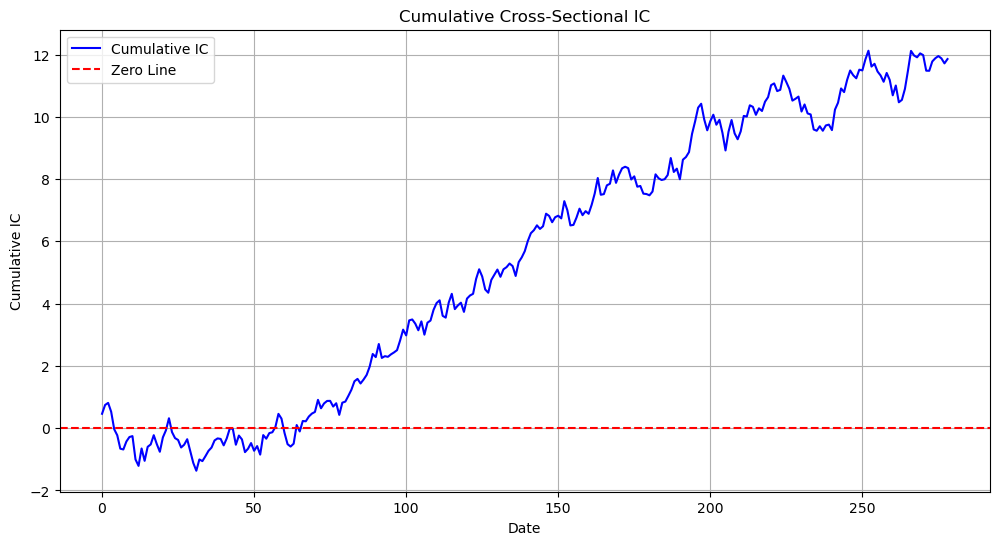

In [16]:
#计算横截面IC
def calculate_ic(predictions, actuals):
    ic_list = []
    for date in predictions.index:
        pred = predictions.loc[date]
        act = actuals.loc[date]
        ic, _ = spearmanr(pred, act)
        ic_list.append(ic)
    return ic_list

ic_values = calculate_ic(forecast_df, test_data)

# 累计IC
cumulative_ic = np.cumsum(ic_values)

#绘图
plt.figure(figsize=(12, 6))
plt.plot(cumulative_ic, label='Cumulative IC', color='blue')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
plt.title('Cumulative Cross-Sectional IC')
plt.xlabel('Date')
plt.ylabel('Cumulative IC')
plt.legend()
plt.grid()
plt.show()

In [17]:
print(f"平均IC: {np.mean(ic_values):.4f}")
print(f"累计IC: {cumulative_ic[-1]:.4f}")

平均IC: 0.0425
累计IC: 11.8560
